In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# EDA

In [3]:
data.shape


(178, 14)

In [4]:
data.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [5]:
data.nunique()

,0
Type,3
Alcohol,126
Malic,133
Ash,79
Alcalinity,63
Magnesium,53
Phenols,97
Flavanoids,132
Nonflavanoids,39
Proanthocyanins,101


**Since we are performing clustering so target variable is of no use in this dataset so,lets drop it.**

In [6]:
data.drop('Type', axis=1, inplace=True)

In [7]:
data.shape

(178, 13)

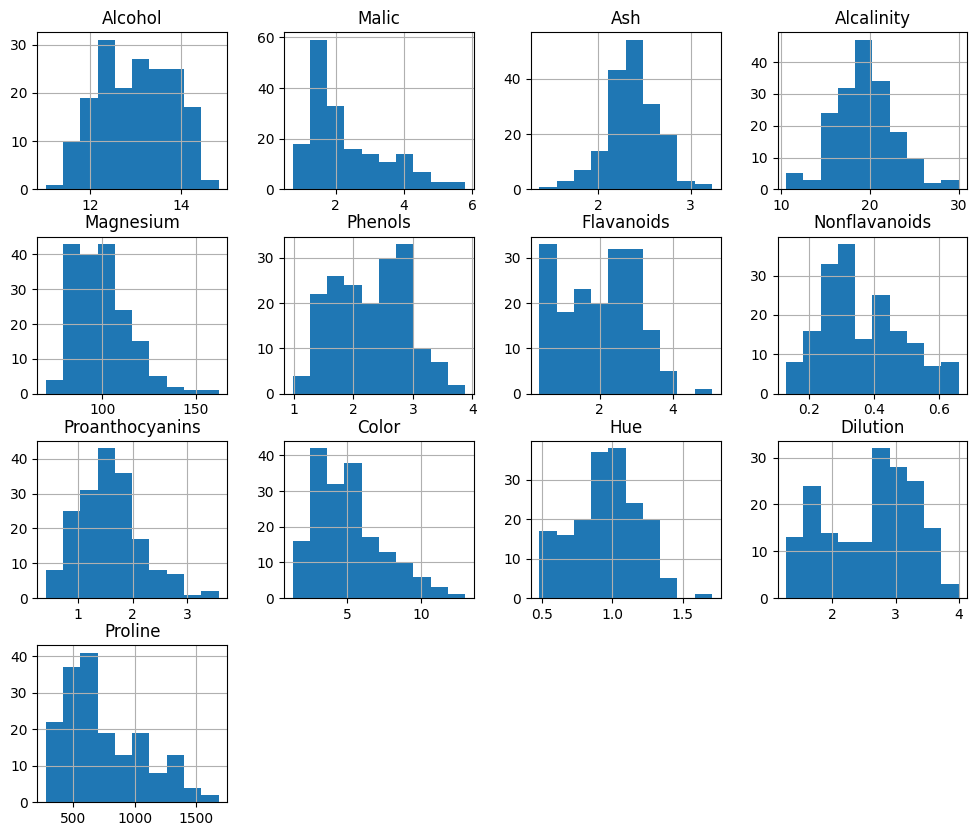

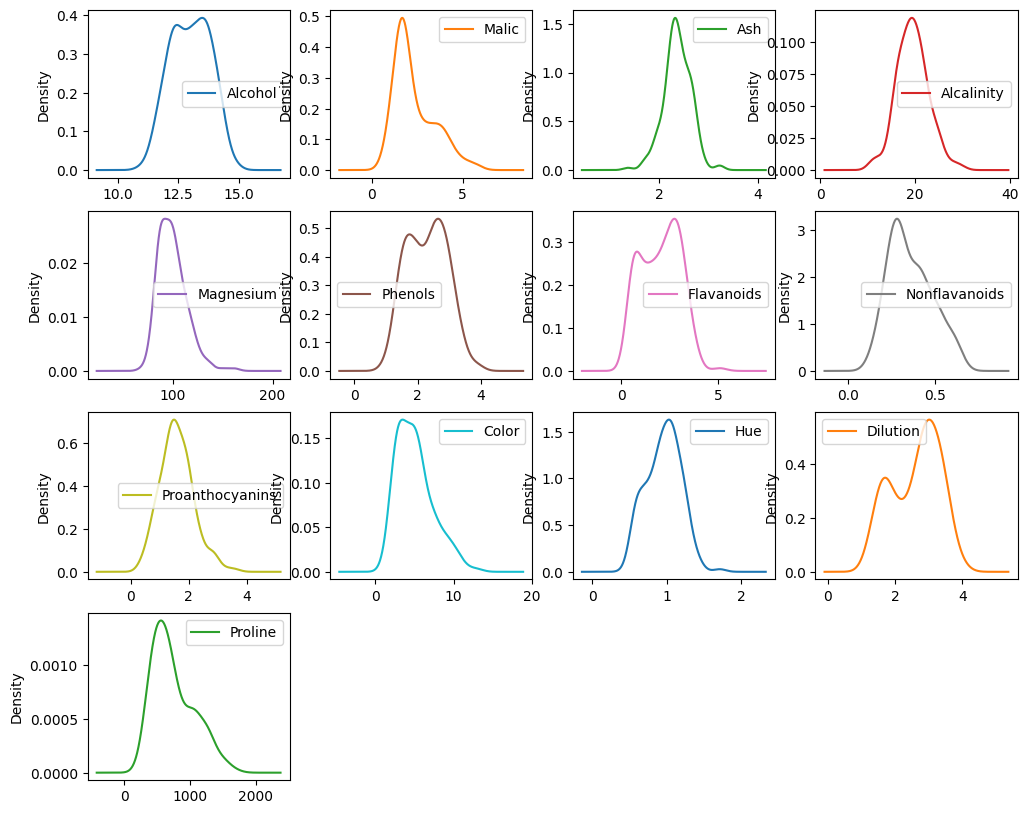

In [8]:
# Histograms and density plot
data.hist(figsize=(12, 10))
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(12, 10))
plt.show()
plt.show()


**Our dataset is normally distributed.**

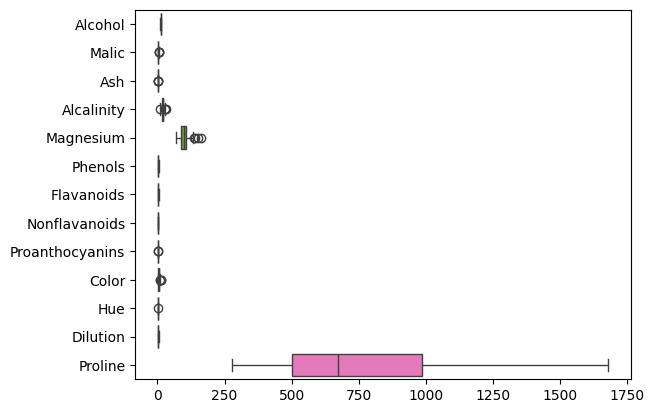

In [9]:
# Box plots
sns.boxplot(data, orient="h")
plt.show()



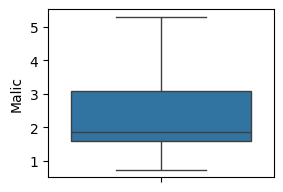

In [10]:
q1 = data['Malic'].quantile(0.25)
q3 = data['Malic'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
data = data.copy()

data['Malic'] = np.where(
    data['Malic'] > upper_limit,
    upper_limit,
    np.where(
        data['Malic'] < lower_limit,
        lower_limit,
        data['Malic']
    )
)

plt.subplot(2,2,4)
sns.boxplot(data['Malic'])

plt.show()

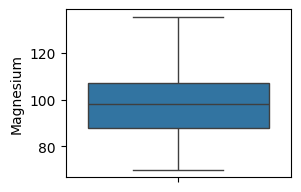

In [11]:
q1 = data['Magnesium'].quantile(0.25)
q3 = data['Magnesium'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
data = data.copy()

data['Magnesium'] = np.where(
    data['Magnesium'] > upper_limit,
    upper_limit,
    np.where(
        data['Magnesium'] < lower_limit,
        lower_limit,
        data['Magnesium']
    )
)

plt.subplot(2,2,4)
sns.boxplot(data['Magnesium'])

plt.show()

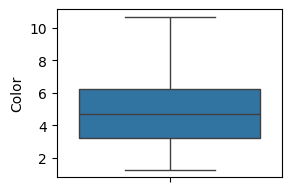

In [12]:
q1 = data['Color'].quantile(0.25)
q3 = data['Color'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
data = data.copy()

data['Color'] = np.where(
    data['Color'] > upper_limit,
    upper_limit,
    np.where(
        data['Color'] < lower_limit,
        lower_limit,
        data['Color']
    )
)

plt.subplot(2,2,4)
sns.boxplot(data['Color'])

plt.show()

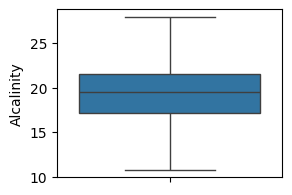

In [13]:
q1 = data["Alcalinity"].quantile(.25)
q3 = data["Alcalinity"].quantile(.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
data = data.copy()
data['Alcalinity'] = np.where(
    data['Alcalinity'] > upper_limit,
    upper_limit,
    np.where(
        data['Alcalinity'] < lower_limit,
        lower_limit,
        data['Alcalinity']
    )
)
plt.subplot(2,2,4)
sns.boxplot(data['Alcalinity'])

plt.show()

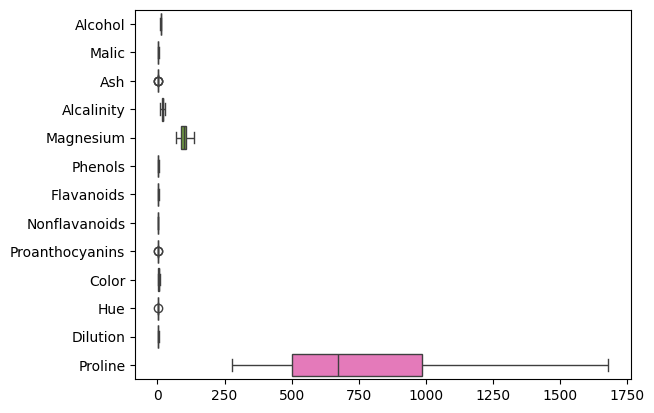

In [14]:
sns.boxplot(data, orient = "h")
plt.show()

In [15]:
data.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.330435,2.366517,19.478090,99.483146,2.295112,2.029270,0.361854,1.590899,5.038146,0.957449,2.611685,746.893258
std,0.811827,1.100173,0.274344,3.287757,13.414186,0.625851,0.998859,0.124453,0.572359,2.260881,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.750000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.302500,3.230000,27.950000,135.500000,3.880000,5.080000,0.660000,3.580000,10.670000,1.710000,4.000000,1680.000000


In [16]:
data.skew()

,0
Alcohol,-0.051482
Malic,0.969169
Ash,-0.176699
Alcalinity,0.114798
Magnesium,0.670809
Phenols,0.086639
Flavanoids,0.025344
Nonflavanoids,0.450151
Proanthocyanins,0.517137
Color,0.735453


In [17]:
data.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094756,0.211545,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.136698,0.549107,-0.071747,0.072343,0.643720
Malic,0.094756,1.000000,0.167174,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.223453,0.264897,-0.564294,-0.372582,-0.191173
Ash,0.211545,0.167174,1.000000,0.442011,0.325647,0.128980,0.115077,0.186230,0.009652,0.255537,-0.074667,0.003911,0.223626
Alcalinity,-0.312191,0.295882,0.442011,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.203975,0.009748,-0.283540,-0.287032,-0.448700
Magnesium,0.302173,-0.039329,0.325647,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.207058,0.240505,0.037513,0.064019,0.411557
Phenols,0.289101,-0.339050,0.128980,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.612413,-0.062101,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.414875,0.115077,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.652692,-0.169807,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.294203,0.186230,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.365845,0.131596,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.223453,0.009652,-0.203975,0.207058,0.612413,0.652692,-0.365845,1.000000,-0.040277,0.295544,0.519067,0.330417
Color,0.549107,0.264897,0.255537,0.009748,0.240505,-0.062101,-0.169807,0.131596,-0.040277,1.000000,-0.519928,-0.430638,0.327100


<Axes: >

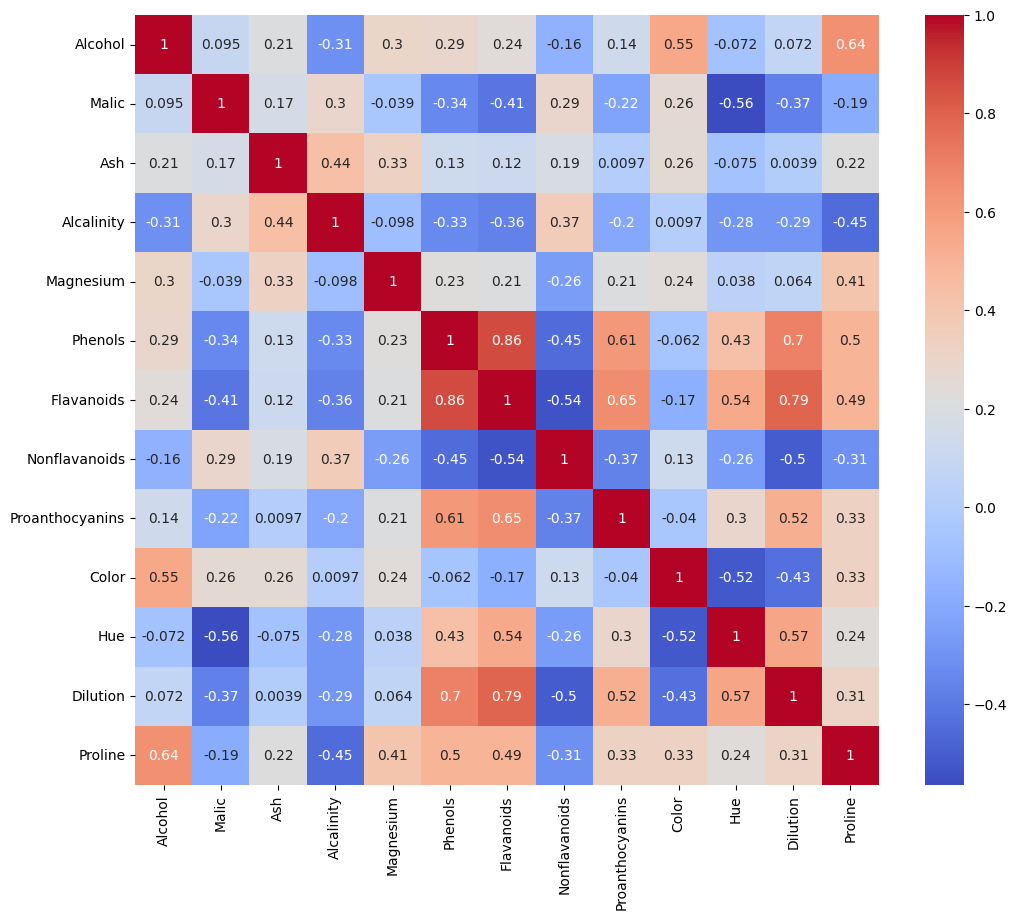

In [18]:
#heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap = "coolwarm")


Columns with strong correlation,
1. proline and alcohol
2. dilution and phenols
3. dilution and flavanoids
4. flavnoids and Proanthocyanins

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

# K-MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

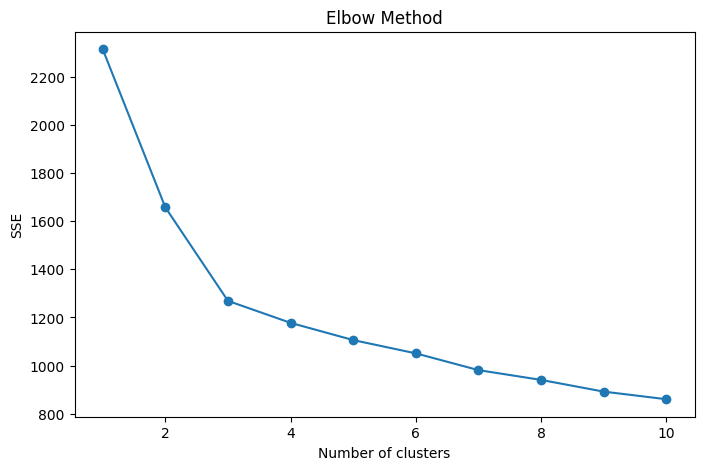

In [20]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

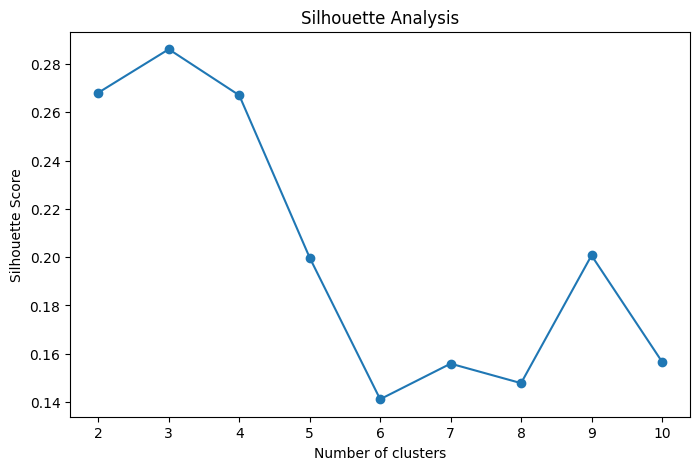

In [21]:
from sklearn.metrics import silhouette_score

# Silhouette analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

Optimal clusters = 3

In [22]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


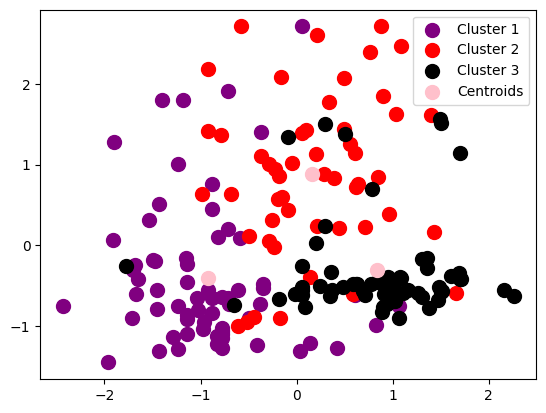

In [23]:
# visualize the result of k means clustering

import matplotlib.pyplot as plt
# Visualizing the clusters - On the first two columns
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 100, c = 'black', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'pink', label = 'Centroids')

plt.legend()


# PCA

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
pc = pca.fit_transform(data)

In [25]:
pd.DataFrame((pca.explained_variance_ratio_)*100)

,0
0,36.323136
1,19.578893
2,11.107662
3,7.064898
4,6.305534
5,4.812971
6,4.094469
7,2.731610
8,2.214471
9,1.944594


In [26]:

# Select the number of components that explain 95% of the variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'Number of components explaining 95% of the variance: {n_components}')

Number of components explaining 95% of the variance: 10


In [27]:
data = pc[:, 0:11]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

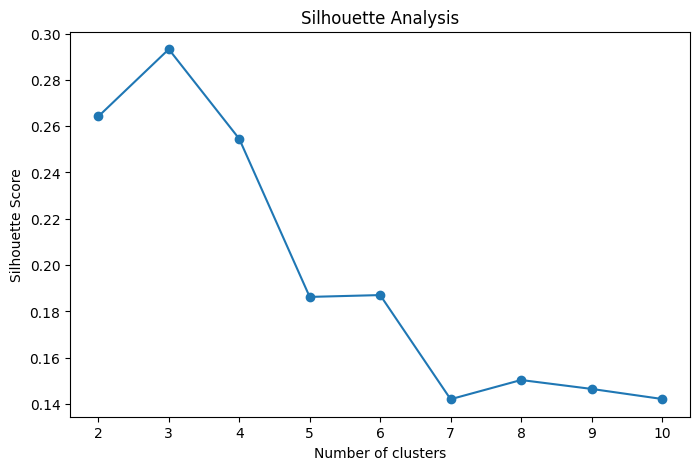

In [28]:
from sklearn.metrics import silhouette_score

# Silhouette analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


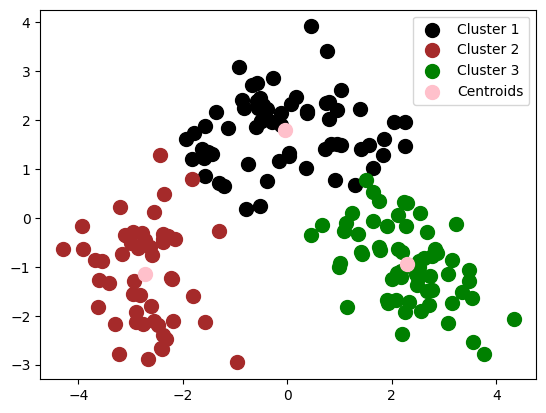

In [30]:
#visualize the result of k means clustering

import matplotlib.pyplot as plt
# Visualizing the clusters - On the first two columns
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, c = 'black', label = 'Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'brown', label = 'Cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'pink', label = 'Centroids')

plt.legend()


After PCA, the clusters have become more defined and clear.